# Data Pre-Processing and Data Analysis

#### Written by Carlos Cuevas Villarmín 

Last update: 29/01/24

**1. Transform Brat format into BIO.**

To do that I am going to use the function brat_to_conll obtained from NeuroNER code [https://github.com/Franck-Dernoncourt/NeuroNER/tree/master/neuroner].

In [1]:
from brat_to_conll import brat_to_conll as b2c

input_folder = "./data"
b2c(input_folder, 'dataBIO.txt', 'spacy', 'en_core_web_sm')

Formatting data set from BRAT to CONLL... Done.


**2. Data pre-processing.**

**2.1. Read the BIO format data.**
Once the data has been charged and transform into BIO format, we read the new file 'dataBIO.txt' and clean it.

In [2]:
#Read the data
import pandas as pd

data = pd.read_csv("dataBIO.txt", sep=' ', names=['words', 'fileId', 'start', 'end', 'label'], quoting=3, on_bad_lines='skip', skip_blank_lines=False)
data[:30]

,words,fileId,start,end,label
0,A,10459028.0,0.0,1.0,O
1,randomized,10459028.0,2.0,12.0,O
2,",",10459028.0,12.0,13.0,O
3,prospective,10459028.0,14.0,25.0,O
4,study,10459028.0,26.0,31.0,O
5,of,10459028.0,32.0,34.0,O
6,endometrial,10459028.0,35.0,46.0,B-intervention
7,resection,10459028.0,47.0,56.0,I-intervention
8,to,10459028.0,57.0,59.0,O
9,prevent,10459028.0,60.0,67.0,O


Then, using the brat_to_conll function for each word in every text, we obtain the file to which it belongs, along with the start and end positions of the word and its corresponding label. Additionally, each sentence is separated by a blank line. In row 21 of the DataFrame, it is evident that in such cases, all the values are NaN. This structure provides the opportunity to add a sentenceID to each word, allowing us to identify all the words belonging to the same sentence.

**2.2. Add senteceID column.** We will define a counter which will be the sentence where the word appears if label value or word value is not NaN. Otherwise, the sentenceID will be 0, i.e., in the cases of a blank line or sentence separator. Finally, I remove all rows with sentenceID=0 in order to not count the separators.

In [3]:
# Create list of sentences and counter
ls = []
counter = 1

for i in range(len(data)):
    # If the current line is not a sentence separator, we add the current counter to the list
    if ((pd.isna(data.words[i]) == False) | (pd.isna(data.label[i]) == False)):
        ls.append(counter)
    # If the current line is a sentence separator, we add 0 to the list and increase the counter by 1
    if ((pd.isna(data.words[i]) == True) & (pd.isna(data.label[i]) == True)):
        ls.append(0)
        counter += 1 
        
# We add the list to the dataframe        
data['sentenceID'] = ls

# Drop rows with data['sentenceID'] == 0
data = data[data['sentenceID'] != 0]

In [4]:
#Visualize the new dataframe
data

,words,fileId,start,end,label,sentenceID
0,A,10459028.0,0.0,1.0,O,1
1,randomized,10459028.0,2.0,12.0,O,1
2,",",10459028.0,12.0,13.0,O,1
3,prospective,10459028.0,14.0,25.0,O,1
4,study,10459028.0,26.0,31.0,O,1
...,...,...,...,...,...,...
376854,risk,9747868.0,2769.0,2773.0,O,13497
376855,for,9747868.0,2774.0,2777.0,O,13497
376856,the,9747868.0,2778.0,2781.0,O,13497
376857,disease,9747868.0,2782.0,2789.0,O,13497


In [5]:
#Confirm if there still exist any NaN values
data.isnull().sum()

words         9
fileId        0
start         0
end           0
label         0
sentenceID    0
dtype: int64

In [6]:
#Drop the NaN values
data = data.dropna(subset=['words'])
len(data) #To confirm that 9 rows were dropped

363354

In [21]:
#Change the type of the column 'start' and 'end' to int
data['start']  = data['start'].astype(int)
data['end']    = data['end'].astype(int)
data['fileId'] = data['fileId'].astype(int) #Change this too based on the file names

data.head()

/tmp/ipykernel_4387/27829772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['start']  = data['start'].astype(int)
/tmp/ipykernel_4387/27829772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['end']    = data['end'].astype(int)
/tmp/ipykernel_4387/27829772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,words,fileId,start,end,label,sentenceID
0,A,10459028,0,1,O,1
1,randomized,10459028,2,12,O,1
2,",",10459028,12,13,O,1
3,prospective,10459028,14,25,O,1
4,study,10459028,26,31,O,1


**3. Data Analysis**

**3.1. Sentence length analysis.** First, compute the metrics for the length of sentences in the data. Then, plot a histogram of sentence lengths to gain an initial understanding of the textual information at the sentence level.

In [8]:
# Metrics for the length of the sentences in the data
data.sentenceID.value_counts().describe(include='all')

count    13497.000000
mean        26.921094
std         15.020794
min          1.000000
25%         17.000000
50%         24.000000
75%         34.000000
max        158.000000
Name: count, dtype: float64

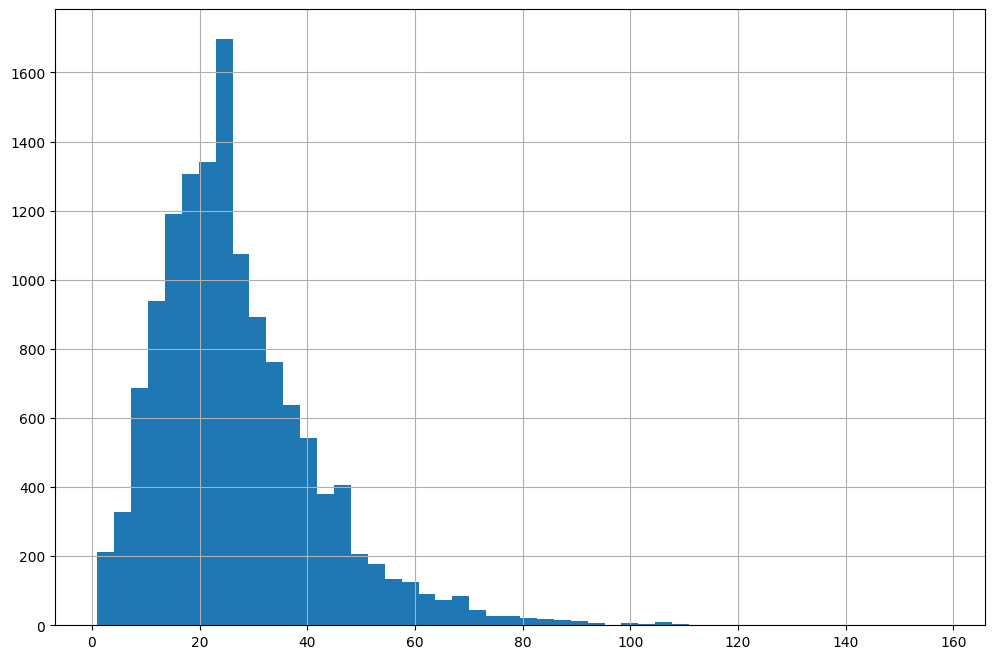

In [9]:
#Plot a histogram of the length of the sentences
import matplotlib.pyplot as plt
data.sentenceID.value_counts().hist(bins=50, figsize=(12, 8))
plt.show()

**3.2.Corpus statistics.** In this section I try to replicate the results obtained in Table 1 of the document [https://aclanthology.org/2022.wiesp-1.4.pdf] where the authors present the frequency of each entity
(sub-category) and the number of abstracts in which
each entity is found.

In [10]:
#Create a copy of the dataframe
data2 = data.copy()

#Drop the rows where the label is O because it is not an entity
data2 = data2[data2['label'] != 'O']

#Count values of the column 'label' that start with 'B-' because it determines the number of entities
Freq = pd.DataFrame(data2['label'].value_counts())

#Drop the rows where the index starts with 'I-'
Freq = Freq[Freq.index.str.startswith('I-') == False]
Freq

#Add the number of fileID uniques where each label appears
Freq['fileID'] = data2.groupby('label')['fileId'].nunique()

#Re-order the labels to be in the same order as in the paper mentioned
Freq = Freq.reindex(['B-total_participants', 'B-intervention_participants','B-control_participants', 'B-age', 'B-eligibility', 'B-ethinicity', 'B-condition', 'B-location', 'B-intervention', 'B-control', 'B-outcome', 'B-outcome_Measure', 'B-iv_bin_abs', 'B-cv_bin_abs', 'B-iv_bin_percent', 'B-cv_bin_percent', 'B-iv_cont_mean', 'B-cv_cont_mean', 'B-iv_cont_median', 'B-cv_cont_median', 'B-iv_cont_sd', 'B-cv_cont_sd', 'B-iv_cont_q1', 'B-cv_cont_q1', 'B-iv_cont_q3', 'B-cv_cont_q3'])

#Sum the values of the column 'count'
print(f'Total number of entities: {Freq["count"].sum()}') #Article: 17739

Freq

Total number of entities: 17589


,count,fileID
label,,
B-total_participants,1088,847
B-intervention_participants,816,651
B-control_participants,719,622
B-age,234,210
B-eligibility,928,864
B-ethinicity,101,83
B-condition,327,321
B-location,186,168
B-intervention,1067,1011


**4. Split into train/validation/test set**

To do that, I will extract from the list of filesID 80% randomly to be the files of the train set and 10% for validation and test sets. Then, I will save the dataframes as dataBIO_train.txt, dataBIO_val.txt and dataBIO_test.txt

In [22]:
#Create a list of the fileID uniques
fileId = data['fileId'].unique()
fileId

array([10459028, 10547391, 11136837, ...,  9672274,  9678620,  9747868])

In [23]:
#Choose randomly 80% of the fileID indexes
import random
random.seed(42)
train = random.sample(list(fileId), int(len(fileId)*0.8))

#Create a list of the fileID indexes that are not in the train list
no_train = list(set(fileId) - set(train))

#Choose randomly 50% of the fileID indexes that are not in the train list
valid = random.sample(no_train, int(len(no_train)*0.5))

#Define test list
test = list(set(no_train) - set(valid))

#Comprobation of the length of the lists
print(f'Length of train set: {len(train)}') 
print(f'Length of validation set: {len(valid)}')
print(f'Length of test set: {len(test)}')
print(f'Total length: {len(train) + len(valid) + len(test)}')


Length of train set: 808
Length of validation set: 101
Length of test set: 102
Total length: 1011


In [28]:
#Generate the dataBIO dataframes for each set
train_df = data[data['fileId'].isin(train)]
valid_df = data[data['fileId'].isin(valid)]
test_df = data[data['fileId'].isin(test)]

#Comprobation of the length of the dataframes
train_df['fileId'].nunique(), valid_df['fileId'].nunique(), test_df['fileId'].nunique()

(808, 101, 102)

**5. Analysis of the sets**

For each set I will define a dataFrame to know how many tokens are per field, how many sentences, ratios, etc.

In [31]:
train_df

,words,fileId,start,end,label,sentenceID
0,A,10459028,0,1,O,1
1,randomized,10459028,2,12,O,1
2,",",10459028,12,13,O,1
3,prospective,10459028,14,25,O,1
4,study,10459028,26,31,O,1
...,...,...,...,...,...,...
376854,risk,9747868,2769,2773,O,13497
376855,for,9747868,2774,2777,O,13497
376856,the,9747868,2778,2781,O,13497
376857,disease,9747868,2782,2789,O,13497


In [53]:
def GenerateInfoDF(df):
    df_info =pd.DataFrame(df.groupby('fileId')['sentenceID'].nunique())
    #Rename the column
    df_info = df_info.rename(columns={'sentenceID':'n_sentences'})
    df_info['n_tokens'] = df.groupby('fileId')['words'].count()
    #Add the number of entities of interest in BIO format (keep B- and I-, drop O)
    df_info['n_entities'] = df.groupby('fileId')['label'].count()-df.groupby('fileId')['label'].apply(lambda x: x.str.startswith('O').sum())
    #Add the number of unique entities of interest in BIO format (keep B-, drop O and I- are the same entity as B-)
    df_info['n_unique_entities'] = df.groupby('fileId')['label'].apply(lambda x: x[x.str.startswith('B-')].nunique())
    #Add the ratio of entities (B- and I-) per sentence
    df_info['ratio_entities_sentence'] = df_info['n_entities'] / df_info['n_sentences']
    #Add the ratio of entities (B- and I-) per token
    df_info['ratio_entities_token'] = df_info['n_entities'] / df_info['n_tokens']

    return df_info


In [60]:
train_info = GenerateInfoDF(train_df)
valid_info = GenerateInfoDF(valid_df)
test_info = GenerateInfoDF(test_df)

In [61]:
print('Train set information per file')
train_info

Train set information per file


,n_sentences,n_tokens,n_entities,n_unique_entities,ratio_entities_sentence,ratio_entities_token
fileId,,,,,,
8523049,15,287,30,6,2.000000,0.104530
9060533,16,405,67,11,4.187500,0.165432
9672274,18,384,34,11,1.888889,0.088542
9678620,11,329,48,9,4.363636,0.145897
9747868,16,548,155,10,9.687500,0.282847
...,...,...,...,...,...,...
33651896,15,390,47,9,3.133333,0.120513
33844409,16,339,48,11,3.000000,0.141593
33847634,10,254,51,11,5.100000,0.200787


In [62]:
print('Train set statistics')
train_info.describe()

Train set statistics


,n_sentences,n_tokens,n_entities,n_unique_entities,ratio_entities_sentence,ratio_entities_token
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,13.429455,360.521040,53.325495,9.443069,4.102463,0.149409
std,3.430308,83.699066,21.340324,2.721565,1.659330,0.052479
min,6.000000,183.000000,10.000000,3.000000,0.769231,0.029412
25%,11.000000,315.000000,38.750000,7.000000,2.909091,0.113288
50%,13.000000,353.000000,50.000000,10.000000,3.897368,0.144129
75%,15.000000,389.000000,65.000000,11.000000,5.000000,0.180082
max,32.000000,851.000000,178.000000,20.000000,14.000000,0.400697


In [63]:
print('Validation set information per file')
valid_info

Validation set information per file


,n_sentences,n_tokens,n_entities,n_unique_entities,ratio_entities_sentence,ratio_entities_token
fileId,,,,,,
9363868,11,384,41,12,3.727273,0.106771
10547391,14,415,80,8,5.714286,0.192771
12374678,11,329,53,6,4.818182,0.161094
14722733,9,341,75,12,8.333333,0.219941
15117982,10,378,43,10,4.300000,0.113757
...,...,...,...,...,...,...
31995035,15,329,53,9,3.533333,0.161094
32000559,15,390,60,10,4.000000,0.153846
32140811,12,426,62,5,5.166667,0.145540


In [64]:
print('Validation set statistics')
valid_info.describe()

Validation set statistics


,n_sentences,n_tokens,n_entities,n_unique_entities,ratio_entities_sentence,ratio_entities_token
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,12.861386,356.742574,50.267327,8.990099,4.065607,0.142661
std,3.252783,77.918374,18.876912,2.397895,1.631893,0.050335
min,7.000000,220.000000,17.000000,5.000000,1.388889,0.048450
25%,11.000000,310.000000,37.000000,7.000000,2.884615,0.106771
50%,12.000000,340.000000,49.000000,9.000000,3.928571,0.137584
75%,15.000000,385.000000,61.000000,10.000000,5.000000,0.172152
max,26.000000,676.000000,115.000000,16.000000,8.333333,0.268939


In [65]:
print('Test set information per file')
test_info

Test set information per file


,n_sentences,n_tokens,n_entities,n_unique_entities,ratio_entities_sentence,ratio_entities_token
fileId,,,,,,
9626201,15,375,47,7,3.133333,0.125333
12775735,12,346,55,11,4.583333,0.158960
12812657,9,352,58,13,6.444444,0.164773
12840087,11,373,53,10,4.818182,0.142091
15135472,14,296,51,7,3.642857,0.172297
...,...,...,...,...,...,...
32122315,16,396,68,7,4.250000,0.171717
32458473,13,313,62,10,4.769231,0.198083
32854772,20,470,42,7,2.100000,0.089362


In [66]:
print('Test set statistics')
test_info.describe()

Test set statistics


,n_sentences,n_tokens,n_entities,n_unique_entities,ratio_entities_sentence,ratio_entities_token
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,13.205882,353.156863,51.745098,9.107843,4.017056,0.147417
std,3.430608,77.068793,19.877190,2.509021,1.539798,0.050563
min,6.000000,203.000000,14.000000,4.000000,1.250000,0.041408
25%,11.000000,306.000000,35.250000,7.000000,2.955882,0.107870
50%,13.000000,347.500000,50.000000,9.000000,3.761905,0.143046
75%,15.000000,378.750000,64.750000,11.000000,4.839161,0.174929
max,24.000000,611.000000,100.000000,16.000000,8.285714,0.288184


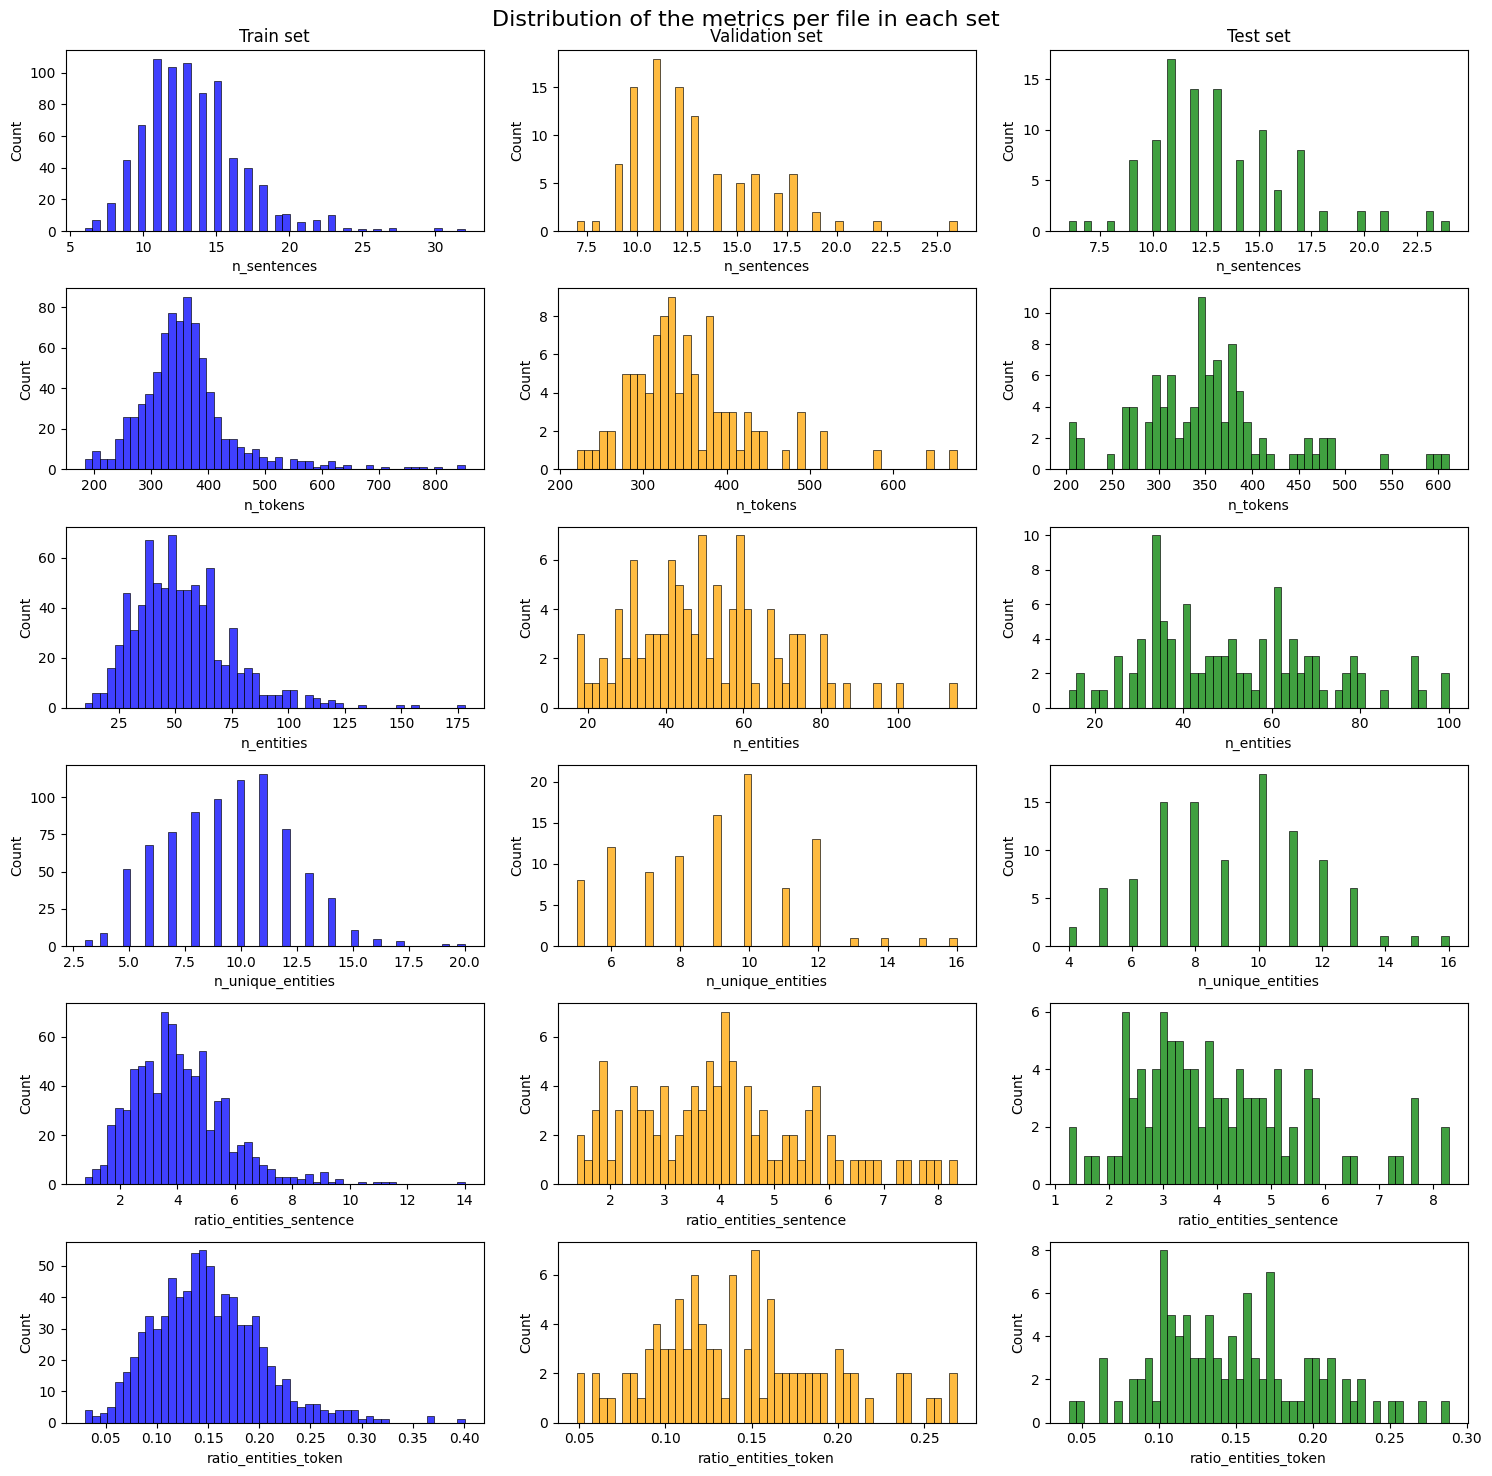

In [76]:
#Generate a plot with subfigures where each row is a column of the dataframe train_info and each column is a set (train, valid, test) and plot a histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 3, figsize=(15, 15))
fig.suptitle('Distribution of the metrics per file in each set', fontsize=16)

sns.histplot(ax=axes[0, 0], data=train_info, x='n_sentences', bins=50, color='blue')
axes[0, 0].set_title('Train set')
sns.histplot(ax=axes[0, 1], data=valid_info, x='n_sentences', bins=50, color='orange')
axes[0, 1].set_title('Validation set')
sns.histplot(ax=axes[0, 2], data=test_info, x='n_sentences', bins=50, color='green')
axes[0, 2].set_title('Test set')

sns.histplot(ax=axes[1, 0], data=train_info, x='n_tokens', bins=50, color='blue')   
sns.histplot(ax=axes[1, 1], data=valid_info, x='n_tokens', bins=50, color='orange')
sns.histplot(ax=axes[1, 2], data=test_info, x='n_tokens', bins=50, color='green')

sns.histplot(ax=axes[2, 0], data=train_info, x='n_entities', bins=50, color='blue')
sns.histplot(ax=axes[2, 1], data=valid_info, x='n_entities', bins=50, color='orange')
sns.histplot(ax=axes[2, 2], data=test_info, x='n_entities', bins=50, color='green')

sns.histplot(ax=axes[3, 0], data=train_info, x='n_unique_entities', bins=50, color='blue')
sns.histplot(ax=axes[3, 1], data=valid_info, x='n_unique_entities', bins=50, color='orange')
sns.histplot(ax=axes[3, 2], data=test_info, x='n_unique_entities', bins=50, color='green')

sns.histplot(ax=axes[4, 0], data=train_info, x='ratio_entities_sentence', bins=50, color='blue')
sns.histplot(ax=axes[4, 1], data=valid_info, x='ratio_entities_sentence', bins=50, color='orange')
sns.histplot(ax=axes[4, 2], data=test_info, x='ratio_entities_sentence', bins=50, color='green')

sns.histplot(ax=axes[5, 0], data=train_info, x='ratio_entities_token', bins=50, color='blue')
sns.histplot(ax=axes[5, 1], data=valid_info, x='ratio_entities_token', bins=50, color='orange')
sns.histplot(ax=axes[5, 2], data=test_info, x='ratio_entities_token', bins=50, color='green')

#Define the distance between the subplots
plt.tight_layout(pad=1.0)

plt.show()





We can conclude that the distribution of the considered metrics are similar in the validation and test set in all the cases and more different to the train set results. However, this is not necessarely a problem and it will be probably caused by the considerably higher number of files in the set.

**6. Save the BIO dataFrames for each set**

In [77]:
train_df.to_csv('trainBIO.txt', sep=' ', index=False)
valid_df.to_csv('validBIO.txt', sep=' ', index=False)
test_df.to_csv('testBIO.txt', sep=' ', index=False)